# CFG Final Project
## Our question is: 

### What have the environmental impacts been on the SpaceX rocket launches, and how could SpaceX minimise their impact moving forward?
- How do SpaceX Rocket launches compare over time? e.g. fuel emissions, fuel types. 
- What is the Space X “space debris” impact? 
- Bonus question: compare space x launches with other countries/locations
- Bonus Machine learning Qs: Predict the amount of space debris is X amount of years. 


Loading Data:

Do we need a SQL Database? I don't think we do... This is a 2 sheet excel spreadsheet so would overcomplicate our queries. 

In [1]:
import pandas as pd 

In [3]:
#Please ensure that the "Launch and ...." sheet is in the same folder as the .pynb file, which it should be if you pulled from Git.

all_launch_df = pd.read_excel("Launch and re-entry database added company.xlsx", sheet_name="2019 launches")

In [4]:
all_launch_df.head()

,l,Day,Month,Year,Latitude,Longitude,Launch location,Rocket Type,Company,Booster fuel type,...,"Boosters mass (each, kg)","Boosters mass (total, kg)",Stage 1 mass (kg),Stage 2 mass (kg),Stage 3 mass (kg),Stage 4 mass (kg),Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg)
0,17.083333,10.0,1.0,2019.0,28.246,102.027,Xichang,CZ-3B/G3,China Aerospace Science and Technology Corpora...,4 x Hypergolic,...,41100.0,164400.0,186200.0,32600.0,18200.0,0.0,0.0,18200.0,383200.0,0.0
1,15.516667,11.0,1.0,2019.0,34.632,-120.611,Vandenberg,Falcon-9 v1.2 (Block 5),SpaceX,NaN,...,0.0,0.0,418700.0,111500.0,0.0,0.0,530200.0,0.0,0.0,0.0
2,0.833333,18.0,1.0,2019.0,31.251,131.082,Kagoshima,Epsilon (2) CLPS,NASA,NaN,...,0.0,0.0,66000.0,15000.0,2500.0,145.0,0.0,0.0,145.0,83500.0
3,19.083333,19.0,1.0,2019.0,34.582,-120.626,Vandenberg,Delta-4H (upg.),United Launch Alliance (ULA),2 x Hydrogen,...,204000.0,408000.0,204000.0,27200.0,0.0,0.0,0.0,639200.0,0.0,0.0
4,5.700000,21.0,1.0,2019.0,40.961,100.298,Jiuquan,CZ-11,China Aerospace Science and Technology Corpora...,NaN,...,0.0,0.0,35000.0,10000.0,4050.0,220.0,0.0,0.0,0.0,49270.0


In [5]:
reentries_df = pd.read_excel("Launch and re-entry database added company.xlsx", sheet_name="2019 re-entries")

In [7]:
reentries_df.head(5)

,Controlled?,Time (UTC),Day,Month,Year,Latitude,Longitude,Rocket,Company,Name,Type,Part,Booster separation altitude (km),Booster mass (km),First stage mass (km),Second stage mass (km),Total Mass (km),NOx from re-entry (km)
0,N,1.516667,1.0,1.0,2019.0,7.823,54.164,CZ-2D,China Aerospace Science and Technology Corpora...,CZ-2D,Rocket body,NaN,NaN,NaN,NaN,NaN,5500.0,5500.0
1,N,7.966667,5.0,1.0,2019.0,-43.753,-179.976,Cosmos 2430,Russian Space Forces (RAF),Cosmos 2430,Payload,NaN,NaN,NaN,NaN,NaN,1900.0,1900.0
2,N,9.533333,5.0,1.0,2019.0,-1.205,89.746,Falcon 9,SpaceX,Faclon 9,Rocket body,Second stage,NaN,NaN,NaN,NaN,4500.0,4500.0
3,N,17.133333,10.0,1.0,2019.0,28.246,102.027,CZ-3B/G3,CASC,CZ-3B/G3,Rocket body,First stage & boosters,50.0,15600.0,9800.0,4000.0,29400.0,14700.0
4,Y,15.566667,11.0,1.0,2019.0,34.632,-120.611,Falcon-9 v1.2 (Block 5),SpaceX,Falcon-9 v1.2 (Block 5),Rocket body,First stage,NaN,0.0,27200.0,NaN,27200.0,4760.0


## Loading SpaceX API 

I started off by importing the "requests" library and reading the data as a JSON format. You have to use pretty print to see the data nicely in an easy-to-read way. 

In [99]:
import requests
from pprint import pprint as pp

endpoint = 'https://api.spacexdata.com/v3/launches'

response = requests.get(endpoint)
data = response.json()
pp(data)

[{'crew': None,
  'details': 'Engine failure at 33 seconds and loss of vehicle',
  'flight_number': 1,
  'is_tentative': False,
  'launch_date_local': '2006-03-25T10:30:00+12:00',
  'launch_date_unix': 1143239400,
  'launch_date_utc': '2006-03-24T22:30:00.000Z',
  'launch_failure_details': {'altitude': None,
                             'reason': 'merlin engine failure',
                             'time': 33},
  'launch_site': {'site_id': 'kwajalein_atoll',
                  'site_name': 'Kwajalein Atoll',
                  'site_name_long': 'Kwajalein Atoll Omelek Island'},
  'launch_success': False,
  'launch_window': 0,
  'launch_year': '2006',
  'links': {'article_link': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html',
            'flickr_images': [],
            'mission_patch': 'https://images2.imgbox.com/40/e3/GypSkayF_o.png',
            'mission_patch_small': 'https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png',
            'presskit': None,
     

  'timeline': {'engine_chill': -420,
               'fairing_deploy': 213,
               'first_stage_entry_burn': 403,
               'first_stage_landing': 497,
               'go_for_launch': -45,
               'go_for_prop_loading': -2280,
               'ignition': -3,
               'liftoff': 0,
               'maxq': 73,
               'meco': 151,
               'payload_deploy': 3734,
               'prelaunch_checks': -60,
               'propellant_pressurization': -60,
               'rp1_loading': -2100,
               'seco-1': 526,
               'seco-2': 2774,
               'second_stage_ignition': 161,
               'second_stage_restart': 2771,
               'stage1_lox_loading': -2100,
               'stage2_lox_loading': -960,
               'stage_sep': 154,
               'webcast_liftoff': 839},
  'upcoming': False},
 {'crew': None,
  'details': 'SpaceX is launching the three satellite RADARSAT Constellation '
             'Mission into Sun Synchronous orb

Then I imported "pandas" library and attempted to create a dataframe using the JSON file. I think the API was too big and missed out lots of data.  

In [100]:
import pandas as pd
df = pd.read_json("https://api.spacexdata.com/v3/launches")
df

,flight_number,mission_name,mission_id,upcoming,launch_year,launch_date_unix,launch_date_utc,launch_date_local,is_tentative,tentative_max_precision,...,static_fire_date_unix,timeline,crew,last_date_update,last_ll_launch_date,last_ll_update,last_wiki_launch_date,last_wiki_revision,last_wiki_update,launch_date_source
0,1,FalconSat,[],False,2006,1143239400,2006-03-24T22:30:00.000Z,2006-03-25T10:30:00+12:00,False,hour,...,1.142554e+09,{'webcast_liftoff': 54},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,DemoSat,[],False,2007,1174439400,2007-03-21T01:10:00.000Z,2007-03-21T13:10:00+12:00,False,hour,...,NaN,{'webcast_liftoff': 60},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Trailblazer,[],False,2008,1217734440,2008-08-03T03:34:00.000Z,2008-08-03T15:34:00+12:00,False,hour,...,NaN,{'webcast_liftoff': 14},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,RatSat,[],False,2008,1222643700,2008-09-28T23:15:00.000Z,2008-09-28T11:15:00+12:00,False,hour,...,1.221869e+09,{'webcast_liftoff': 5},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,RazakSat,[],False,2009,1247456100,2009-07-13T03:35:00.000Z,2009-07-13T15:35:00+12:00,False,hour,...,NaN,{'webcast_liftoff': 5},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,Crew-1,[EE86F74],False,2020,1605486420,2020-11-16T00:27:00.000Z,2020-11-15T19:27:00-05:00,False,hour,...,NaN,None,[],2020-11-13T21:31:19.000Z,None,None,2020-11-16T00:27:00.000Z,90e9da15-25f7-11eb-badd-0e3a392f3e47,2020-11-13T21:31:19.000Z,wiki
107,108,Sentinel-6 Michael Freilich,[],False,2020,1605979020,2020-11-21T17:17:00.000Z,2020-11-21T09:17:00-08:00,False,hour,...,1.605619e+09,None,None,2020-11-17T19:27:21.000Z,2020-11-21T17:17:00.000Z,2020-11-05T23:48:07.000Z,2020-11-21T17:17:00.000Z,e93220d1-290a-11eb-bd82-0e4885cc0cd7,2020-11-17T19:27:21.000Z,wiki
108,109,Starlink-15 (v1.0),[],False,2020,1603553460,2020-10-24T15:31:00.000Z,2020-10-24T11:31:00-04:00,False,hour,...,1.605976e+09,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,110,CRS-21,[EE86F74],True,2020,1607271420,2020-12-06T16:17:00.000Z,2020-12-06T11:17:00-05:00,False,hour,...,NaN,None,None,2020-12-05T13:04:54.000Z,None,None,2020-12-06T16:17:00.000Z,774e7809-36fa-11eb-a5dc-0e33339b29dd,2020-12-05T13:04:54.000Z,wiki


## Using this website - https://github.com/shawnmavunga/Space_X_Launches_Data_Analysis

Requesting the rocket launch data from the SpaceX API as before, but using the past rocket launch data. Also checking the content of the response as before, but not using pretty print. 

In [101]:
spacex_url="https://api.spacexdata.com/v4/launches/past"
response = requests.get(spacex_url)
print(response.content) 

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

## json_normalise() 
After some research, I found this function. It is a method from the pandas library that converts nested JSON data objects into DataFrames - each nested level in the JSON object is turned into a new column/Series in the DF. 

In [102]:
json1 = response.json()
data = pd.json_normalize(json1)
data

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,https://youtu.be/NONM-xsKMSs,NONM-xsKMSs,None,None,NaN
183,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,None,None,None,None,NaN
184,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,https://youtu.be/ZlQHF_yBkMQ,ZlQHF_yBkMQ,None,None,NaN
185,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,https://youtu.be/VVu2bSJJhgI,VVu2bSJJhgI,None,None,NaN


However, when doing this alot of the data is IDs and not the names that we need which makes it hard to read and hard to analyse. For example, the rocket column has no info about the rocket, just the ID number. 

The next set of code uses the API again to get information about the launches using the IDs for each space launch. 

## Definitions:
'payload' - a payload in terms of a rocket launch is any cargo/equipment that is carried by a rocket and intended to be deployed in space or delivered to a specific destination. It is typically placed on top of the rocket and separated from the rocket's stages once it reaches its destination. The rocket is designed to carry the payload into space. 
'launchpad' - The facility where the rocket is launched from
'cores' - a core in terms of a rocket launch refers to the central structure of a rocket's main engine - it can be multiple cores. It can be reusable for future launches, and in this case the core includes not only the main engine, but also additional equipment such as landing legs, guidance systems, and parachutes. The ability to recover and reuse rocket cores can significantly reduce the cost of spaceflight, as it eliminates the need to build a new rocket for each launch. SpaceX's Falcon 9 rocket, for example, uses reusable first-stage cores that can be landed and recovered for future launches.

In [103]:
#subset of our dataframe keeping only the features we want and the flight number
data = data[['rocket', 'success', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
# data = data[data['cores'].map(len)==1]
# data = data[data['payloads'].map(len)==1]

# # Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
# data['cores'] = data['cores'].map(lambda x : x[0])
# data['payloads'] = data['payloads'].map(lambda x : x[0])

# Convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date
data

/var/folders/_s/fkyxn_r11gv2n44w8pkq9n340000gn/T/ipykernel_790/3104805211.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date_utc']).dt.date


,rocket,success,payloads,launchpad,cores,flight_number,date_utc,date
0,5e9d0d95eda69955f709d1eb,False,[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,"[{'core': '5e9e289df35918033d3b2623', 'flight'...",1,2006-03-24T22:30:00.000Z,2006-03-24
1,5e9d0d95eda69955f709d1eb,False,[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef35918416a3b2624', 'flight'...",2,2007-03-21T01:10:00.000Z,2007-03-21
2,5e9d0d95eda69955f709d1eb,False,"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006e...",5e9e4502f5090995de566f86,"[{'core': '5e9e289ef3591814873b2625', 'flight'...",3,2008-08-03T03:34:00.000Z,2008-08-03
3,5e9d0d95eda69955f709d1eb,True,[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef3591855dc3b2626', 'flight'...",4,2008-09-28T23:15:00.000Z,2008-09-28
4,5e9d0d95eda69955f709d1eb,True,[5eb0e4b7b6c3bb0006eeb1e6],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef359184f103b2627', 'flight'...",5,2009-07-13T03:35:00.000Z,2009-07-13
...,...,...,...,...,...,...,...,...
182,5e9d0d95eda69973a809d1ec,True,"[631614e9ffc78f3b85670717, 631617fbffc78f3b856...",5e9e4501f509094ba4566f84,"[{'core': '5e9e28a6f359183c413b265d', 'flight'...",183,2022-09-05T02:09:00.000Z,2022-09-05
183,5e9d0d95eda69973a809d1ec,True,"[63161610ffc78f3b85670718, 63161872ffc78f3b856...",5e9e4502f509094188566f88,"[{'core': '5e9e28a7f3591817f23b2663', 'flight'...",184,2022-09-11T01:10:00.000Z,2022-09-11
184,5e9d0d95eda69973a809d1ec,True,[63161699ffc78f3b85670719],5e9e4501f509094ba4566f84,"[{'core': '60b800111f83cc1e59f16438', 'flight'...",185,2022-09-17T01:05:00.000Z,2022-09-17
185,5e9d0d95eda69973a809d1ec,True,[631616a7ffc78f3b8567071a],5e9e4501f509094ba4566f84,"[{'core': '627843d657b51b752c5c5a53', 'flight'...",186,2022-09-24T23:30:00.000Z,2022-09-24


### From each subset (nested JSON), we want to know specific data... 

From the ROCKET subset, we want to know the booster name i.e. the name of the Rocket (Falcon 1, Falcon 9). This will help us compare rocket launch data with other DataFrames. 

From the PAYLOAD, we want to know the mass of the payload, and the orbit that it is going to. This will help us compare rocket launch data with other DataFrames. 

From the LAUNCHPAD, we want to know the name of the launchsite being used, the longitude and the latitude. This can then be used to compare with other rocket launches. 

From CORES, we want to know the outcome of the langing, the type of landing, the number of flights with the reusable core, whether gridfins were used (a grid fin stabilizer used to steer and stabailise a rocket during its descent through the atmosphere), whether legs were used, the landing pad is used, and some data about the cores. 


We have set up some empty lists. To get this information from the JSON, we need to create some functions with for loops to iterate throught the file and append the data to the empty lists. 

In [104]:
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

Test that the list is empty before you run the code for the function. 

In [105]:
BoosterVersion

[]

## Understand the code for the function  

1. The function takes the parameter data (which is the JSON file from above)
2. The column ['rocket'] contains the rocket IDs - we have created a for loop saying for every rocket ID in the rocket column, the function sends a GET request to the SpaceX API to retrieve any additional data about the rocket, specifically to get the booster name. 
3. The name of each rocket is retrived from the API and it is appended to the BoosterVersion list. 

In [106]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list

def getBoosterVersion(data):
    for x in data['rocket']:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

getBoosterVersion(data)

Testing the list is full of Booster names, sliced the list so we don't get the full list. 

In [107]:
BoosterVersion[0:8]

['Falcon 1',
 'Falcon 1',
 'Falcon 1',
 'Falcon 1',
 'Falcon 1',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9']

In [109]:
set(BoosterVersion)

{'Falcon 1', 'Falcon 9', 'Falcon Heavy'}

## Understand the code for the function  
Very similar to the code above - 
1. The function takes the parameter data (which is the JSON file from above)
2. The column ['launchpad'] contains the launchpad IDs - we have created a for loop saying for every launchpad ID in the 'launchpad' column, the function sends a GET request to the SpaceX API to retrieve any additional data about the launchpad, specifically to get the launchsite, longitude and latitude. 
3. The longitude, latitude and LaunchSite of each launchpad is retrieved from the API and appended to the respective list.

In [110]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
        response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
        Longitude.append(response['longitude'])
        Latitude.append(response['latitude'])
        LaunchSite.append(response['name'])



In [112]:
getLaunchSite(data)

## Understand the code for the function  

Again the function is very similar to the above 2 functions - 

1. The function takes the parameter data (which is the JSON file from above)
2. The column ['payloads'] contains the payload IDs - we have created a for loop saying for every payload ID in the payload column, the function sends a GET request to the SpaceX API to retrieve any additional data about the payload, specifically to get the mass (in KG) and the type of orbit it is intended to reach. 
3. The Payload in kg and the Orbit information is appended to their respective lists.

In [113]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for loads in data['payloads']:
        for load in loads:
            response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
            PayloadMass.append(response['mass_kg'])
            Orbit.append(response['orbit'])

In [114]:
getPayloadData(data)

## Understand the code for the function  

The function is similar to the above functions, except it now uses an if/else statement- 

1. The function takes the parameter data (which is the JSON file from above)
2. The column ['core'] contains the core IDs - we have created a for loop saying for every core ID in the core column, the function sends a GET request to the SpaceX API to retrieve any additional data about the cores, specifically its block number, reuse count, serial number, landing outcome, number of flights, gridfin status, reuse status, number of legs, and landing pad location. 
3. Because of the added if/else statement - If the core ID in the current iteration is NOT equal to None, (meaning it is equal to a valid core ID), the retrieved data for the core is appended to their respective lists: 'Block', 'ReusedCount', and 'Serial'.
4. ELSE - If the core ID IS EQUAL to None, then the corresponding data for the core is set to None and appended to their respective lists: 'Block', 'ReusedCount', and 'Serial'. 

The landing outcome for the core is also appended to the 'Outcome' list, and the remaining core data ('Flights', 'GridFins', 'Reused', 'Legs', and 'LandingPad') is appended to their respective lists regardless of whether the core ID is None or not. This is beacuse this code is outside of the if/else statements. 

In [115]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for cores in data['cores']:
        for core in cores:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [116]:
getCoreData(data)

Constructing our new dataset using the data we have obtained. Combining the columns into a dictionary. The Key is the column name and the Values are the lists from above. 

In [117]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'RocketName':BoosterVersion,
'PayloadMassKG':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

Creating a new Pandas DF using the dictionary we have just created above. The .shape tells us how many rows and columns our DF has. 

In [120]:
# Create a dataframe from launch_dict
dflaunch = pd.DataFrame.from_dict(launch_dict, orient='index').transpose()
dflaunch.shape

(374, 17)

And here is our new Dataframe!! :) 

In [127]:
# Show the head of the dataframe
dflaunch.head(5)

,FlightNumber,Date,RocketName,PayloadMassKG,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,None,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin2A,167.743129,9.047721
2,3,2008-08-03,Falcon 1,None,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin1C,167.743129,9.047721
3,4,2008-09-28,Falcon 1,None,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin2C,167.743129,9.047721
4,5,2009-07-13,Falcon 1,165,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin3C,167.743129,9.047721


### Reading in the Kaggle "Space Decay CSV"

**Source Data**: A database on ‘flying objects’ that are currently within the Earth’s orbit, including satellites and rocket launch debris. The data has been extracted from an API provided by space-track.org  https://www.kaggle.com/datasets/kandhalkhandeka/satellites-and-debris-in-earths-orbit

In [58]:
import pandas as pd
df_space_decay = pd.read_csv('space_decay.csv')
df_space_decay.head(2)

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:46:11,18 SPCS,ARIANE 42P+ DEB,1992-072J,EARTH,TEME,UTC,SGP4,...,MEDIUM,FR,1992.0,FRGUI,NaN,3195178,188614016,0 ARIANE 42P+ DEB,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...
1,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,SL-8 DEB,1979-028C,EARTH,TEME,UTC,SGP4,...,SMALL,CIS,1979.0,PKMTR,NaN,3194950,188593285,0 SL-8 DEB,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...


In [59]:
df_space_decay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14372 entries, 0 to 14371
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CCSDS_OMM_VERS       14372 non-null  int64  
 1   COMMENT              14372 non-null  object 
 2   CREATION_DATE        14372 non-null  object 
 3   ORIGINATOR           14372 non-null  object 
 4   OBJECT_NAME          14372 non-null  object 
 5   OBJECT_ID            14333 non-null  object 
 6   CENTER_NAME          14372 non-null  object 
 7   REF_FRAME            14372 non-null  object 
 8   TIME_SYSTEM          14372 non-null  object 
 9   MEAN_ELEMENT_THEORY  14372 non-null  object 
 10  EPOCH                14372 non-null  object 
 11  MEAN_MOTION          14372 non-null  float64
 12  ECCENTRICITY         14372 non-null  float64
 13  INCLINATION          14372 non-null  float64
 14  RA_OF_ASC_NODE       14372 non-null  float64
 15  ARG_OF_PERICENTER    14372 non-null 

In [60]:
df_space_decay.shape

(14372, 40)

## Data Cleaning

In [56]:
#Checking space_deacy.csv for NaN values
nan_values = df_space_decay.isna()
nan_values # pandas.core.frame.DataFrame

#DECAY_DATE column is empty - to be removed
#Columns not required for analysis  - CCSDS_OMM_VERS, COMMENT, CREATION_DATE, ORIGINATOR, FILE, GP_ID

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14367,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
14368,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
14369,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
14370,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False


In [61]:
# Drop the columns with all NaN values and modify original DF ('DECAY_DATE' column)  
df_space_decay = df_space_decay.dropna(axis=1, how='all')

# Drop unrequired columns:
df_space_decay = df_space_decay.drop(['COMMENT', 'CREATION_DATE', 'ORIGINATOR', 'FILE', 'GP_ID'], axis=1)

In [63]:
#Filled Launch date with the mean date
df_space_decay.LAUNCH_DATE = df_space_decay.LAUNCH_DATE.fillna('2004')

#Filled Country code with the string 'unknown'
df_space_decay.COUNTRY_CODE = df_space_decay.COUNTRY_CODE.fillna('unknown')

In [66]:
#Deleted rows with NA values as they are "To be assigned" and as such not valuable for our analyis
df_space_decay.isna()
df_space_decay.dropna(how='any', inplace=True)
df_space_decay.shape

(14174, 34)

In [70]:
#saved clean data to new CSV file in case we want to export for any reasons
#df_space_decay.to_csv('../CFG_final_project/space_decay_clean.csv', encoding='utf-8')

df_space_decay.to_csv("space_decay_clean.csv", index=False, encoding='utf-8')

### Clean Data file & new dataframe (df_decay)
- Columns probably could be further reduced if not required, however, the dataset is not that big.

In [73]:
#Read new clean file into new dataframe 
df_decay = pd.read_csv("space_decay_clean.csv")#.reset_index(drop=True)
df_decay.isna() # check new file/df for a NaN values

,CCSDS_OMM_VERS,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,ECCENTRICITY,...,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14169,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14171,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14172,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Cleaning Launch and re-entry database all_launch_df

In [74]:
# Filled NaN values with n/a following orginal dataset 
all_launch_df.isna()

# remove rows where 'Rocket Type' is na, as there are some rows in Excel that are imported into DF that
# only contained 'Company' information, these rows need to be removed
all_launch_df.dropna(subset=['Rocket Type'], inplace=True)

#columns_to_fill = ['Booster fuel type', 'Stage 1 fuel type', 'Stage 2 fuel type', 'Stage 3 fuel type', 'Stage 4 fuel type']
#all_launch_df[columns_to_fill] = all_launch_df[columns_to_fill].fillna('n/a')

,l,Day,Month,Year,Latitude,Longitude,Launch location,Rocket Type,Company,Booster fuel type,...,"Boosters mass (each, kg)","Boosters mass (total, kg)",Stage 1 mass (kg),Stage 2 mass (kg),Stage 3 mass (kg),Stage 4 mass (kg),Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,True,True,True,True,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
181,True,True,True,True,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
182,True,True,True,True,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
183,True,True,True,True,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True


In [79]:
all_launch_df.shape

(103, 24)

In [81]:
remove_white_space_columns = ['Launch location', 'Rocket Type', 'Booster fuel type', 'Stage 1 fuel type', 'Stage 2 fuel type', 'Stage 3 fuel type', 'Stage 4 fuel type']
def strip_whitespace(value):
    if isinstance(value, str):
        return value.strip()
    else:
        return value

all_launch_df[remove_white_space_columns] = all_launch_df[remove_white_space_columns].applymap(strip_whitespace) 

In [86]:
columns_of_interest = ['Boosters mass (total, kg)', 'Stage 1 mass (kg)', 'Stage 2 mass (kg)',
                       'Stage 3 mass (kg)', 'Stage 4 mass (kg)', 'Kerosene mass (kg)', 
                       'Hydrogen mass (kg)', 'Hypergolic mass (kg)', 'Solid fuel mass (kg)']

# Filter rows with 0 in any of the columns of interest
df_interest = all_launch_df[all_launch_df[columns_of_interest].isin([0]).any(axis=1)]
df_interest.shape

(103, 24)

## Cleaning Launch and re-entry database reentries_df

In [89]:
reentries_df.shape

(186, 18)

In [95]:
# similarly to what we did to all_launch_df above, remove rows where 'Rocket' is na, 
# this will remove any rows that don't have 'Rocket' information

reentries_df.dropna(subset=['Rocket'], inplace=True)

In [96]:
reentries_df.shape

(185, 18)

In [ ]:
!pip install missingno

In [93]:
import missingno as msno

<AxesSubplot:>

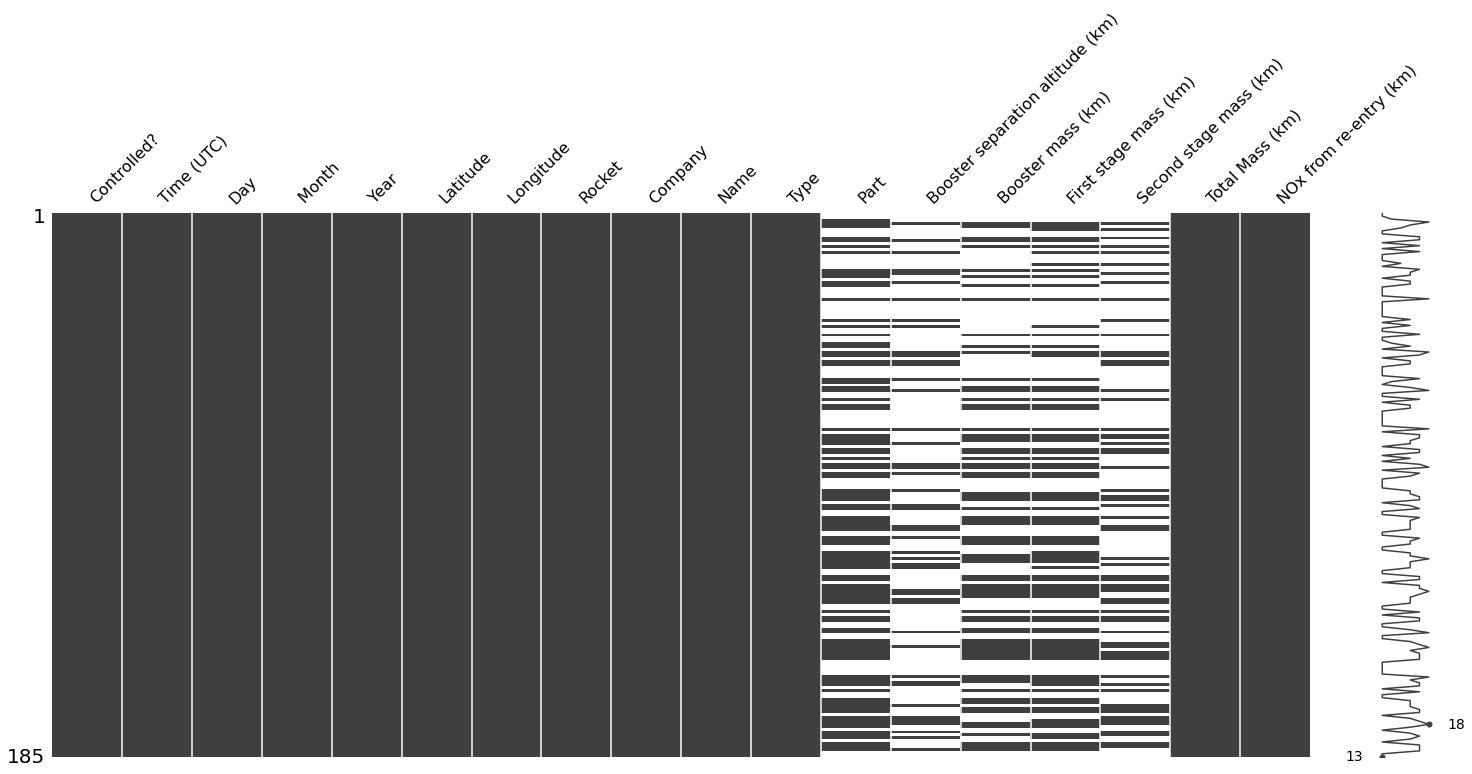

In [97]:
# Shows a matrix of NaN values for all the visual peoples
msno.matrix(reentries_df)
#What columns do we want to keep? 

## Cleaning Space X API df (dflaunch)

In [124]:
# Wrote DataFrame to a CSV file to cross check data in the dataframe, 
dflaunch.to_csv('dflaunch.csv', index=False)

In [125]:
dflaunch.shape

(374, 17)

In [130]:
#Dropped rows where Rocket Name column was empty, modify origianl DF
dflaunch.dropna(subset=['RocketName'], inplace=True)

# keep gridfins, reused, legs?

dflaunch.isna()
#to delete landingpad, block, flights

# to fill or delete nan values 

,FlightNumber,Date,RocketName,PayloadMassKG,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
183,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
184,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
185,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


## Subquestion A
### How do SpaceX Rocket launches compare? e.g. fuel emissions, fuel types.

1. We have already read the Excel files we are going to use and read the tables into pandas DataFrames. 

In [72]:
import matplotlib.pyplot as plt

In [60]:
all_launch_df.head()

,l,Day,Month,Year,Latitude,Longitude,Launch location,Rocket Type,Company,Booster fuel type,...,"Boosters mass (each, kg)","Boosters mass (total, kg)",Stage 1 mass (kg),Stage 2 mass (kg),Stage 3 mass (kg),Stage 4 mass (kg),Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg)
0,17.083333,10.0,1.0,2019.0,28.246,102.027,Xichang,CZ-3B/G3,China Aerospace Science and Technology Corpora...,4 x Hypergolic,...,41100.0,164400.0,186200.0,32600.0,18200.0,0.0,0.0,18200.0,383200.0,0.0
1,15.516667,11.0,1.0,2019.0,34.632,-120.611,Vandenberg,Falcon-9 v1.2 (Block 5),SpaceX,NaN,...,0.0,0.0,418700.0,111500.0,0.0,0.0,530200.0,0.0,0.0,0.0
2,0.833333,18.0,1.0,2019.0,31.251,131.082,Kagoshima,Epsilon (2) CLPS,NASA,NaN,...,0.0,0.0,66000.0,15000.0,2500.0,145.0,0.0,0.0,145.0,83500.0
3,19.083333,19.0,1.0,2019.0,34.582,-120.626,Vandenberg,Delta-4H (upg.),United Launch Alliance (ULA),2 x Hydrogen,...,204000.0,408000.0,204000.0,27200.0,0.0,0.0,0.0,639200.0,0.0,0.0
4,5.700000,21.0,1.0,2019.0,40.961,100.298,Jiuquan,CZ-11,China Aerospace Science and Technology Corpora...,NaN,...,0.0,0.0,35000.0,10000.0,4050.0,220.0,0.0,0.0,0.0,49270.0


In [61]:
reentries_df.head()

,Controlled?,Time (UTC),Day,Month,Year,Latitude,Longitude,Rocket,Company,Name,Type,Part,Booster separation altitude (km),Booster mass (km),First stage mass (km),Second stage mass (km),Total Mass (km),NOx from re-entry (km)
0,N,1.516667,1.0,1.0,2019.0,7.823,54.164,CZ-2D,China Aerospace Science and Technology Corpora...,CZ-2D,Rocket body,NaN,NaN,NaN,NaN,NaN,5500.0,5500.0
1,N,7.966667,5.0,1.0,2019.0,-43.753,-179.976,Cosmos 2430,Russian Space Forces (RAF),Cosmos 2430,Payload,NaN,NaN,NaN,NaN,NaN,1900.0,1900.0
2,N,9.533333,5.0,1.0,2019.0,-1.205,89.746,Falcon 9,SpaceX,Faclon 9,Rocket body,Second stage,NaN,NaN,NaN,NaN,4500.0,4500.0
3,N,17.133333,10.0,1.0,2019.0,28.246,102.027,CZ-3B/G3,CASC,CZ-3B/G3,Rocket body,First stage & boosters,50.0,15600.0,9800.0,4000.0,29400.0,14700.0
4,Y,15.566667,11.0,1.0,2019.0,34.632,-120.611,Falcon-9 v1.2 (Block 5),SpaceX,Falcon-9 v1.2 (Block 5),Rocket body,First stage,NaN,0.0,27200.0,NaN,27200.0,4760.0


### Emission factors for each fuel type:

These emission factors provide a standardised measure to estimate the amount of carbon dioxide emissions associated with different types of rocket fuels. They will help us to assess the environmental impact of rocket launches and help us to understand the how emissions are impacting the carbon footprint of space exploration. 



- **kerosene_emission_factor = 3.1  # kg CO2 per kg of kerosene**
    *The kerosene emission factor refers to the amount of carbon dioxide (CO2) produced when burning one kilogram of kerosene as a fuel for the rocket. It quantifies the greenhouse gas emissions associated with the combustion of kerosene during the rocket launch.*
- **hydrogen_emission_factor = 0.9  # kg CO2 per kg of hydrogen**
    *The hydrogen emission factor represents the quantity of carbon dioxide (CO2) released when one kilogram of hydrogen is burned as fuel for the rocket. It indicates the level of greenhouse gas emissions resulting from the combustion process using hydrogen as a propellant.*
- **hypergolic_emission_factor = 2.5  # kg CO2 per kg of hypergolic fuel**
    *The hypergolic emission factor signifies the amount of carbon dioxide (CO2) generated when one kilogram of hypergolic fuel is burned in the rocket's engines. It denotes the emissions associated with the combustion of hypergolic fuels, which are a type of propellant that ignites spontaneously when they come into contact with each other.*
- **solid_fuel_emission_factor = 2.8  # kg CO2 per kg of solid fuel**
    *The solid fuel emission factor represents the quantity of carbon dioxide (CO2) produced when one kilogram of solid fuel is burned as propellant in the rocket. It indicates the level of greenhouse gas emissions resulting from the combustion of solid fuels, which are typically used in rocket motors for their high energy content.*


In [67]:
#Defining the emission factors for each fuel type
kerosene_emission_factor = 3.1  # kg CO2 per kg of kerosene
hydrogen_emission_factor = 0.9  # kg CO2 per kg of hydrogen
hypergolic_emission_factor = 2.5  # kg CO2 per kg of hypergolic fuel
solid_fuel_emission_factor = 2.8  # kg CO2 per kg of solid fuel


In [68]:
#Calculating the total fuel emissions for each launch
all_launch_df['Total Fuel Emissions'] = (
    all_launch_df['Kerosene mass (kg)'] * kerosene_emission_factor +
    all_launch_df['Hydrogen mass (kg)'] * hydrogen_emission_factor +
    all_launch_df['Hypergolic mass (kg)'] * hypergolic_emission_factor +
    all_launch_df['Solid fuel mass (kg)'] * solid_fuel_emission_factor
)


In [122]:
# Group the launches by Rocket Type and calculate the total fuel emissions for each type
fuel_type_emissions = all_launch_df.groupby('Rocket Type')['Total Fuel Emissions'].sum()
fuel_type_emissions

Rocket Type
Antares-230                       817960.0
Antares-230+                      817960.0
Ariane-5ECA                      4544730.0
Ariane-5ECA+                     1515234.0
Atlas-5(551)                     1496219.0
Atlas-5(N22)                     1138127.0
CZ-11                             275912.0
CZ-11H                            137956.0
CZ-2C (3)                         445000.0
CZ-2D (2)                         546875.0
CZ-3B/G2                          974380.0
CZ-3B/G3                         6820660.0
CZ-3B/G3Z                        2923140.0
CZ-3C/G2                          768880.0
CZ-4B                            2327500.0
CZ-4C                            1745625.0
CZ-5                             2047610.0
CZ-6                              291958.0
Delta-4H (upg.)                   575280.0
Delta-4M+(4,2) (upg.)             368289.0
Delta-4M+(5,4) (upg.)             540720.0
Electron KS                       210180.0
Epsilon (2) CLPS                  234162.5

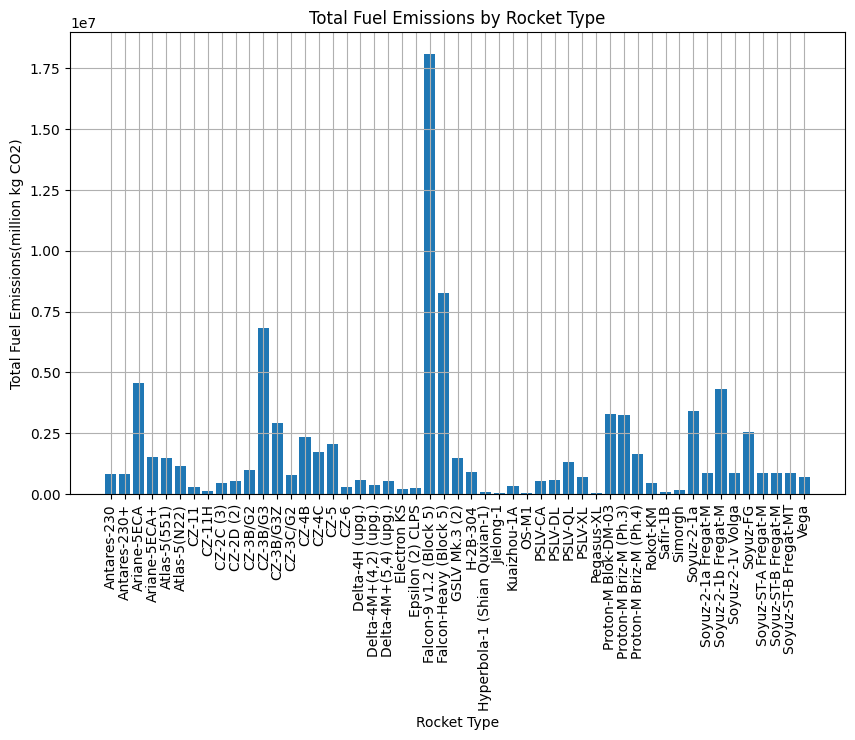

In [133]:
# Plot a bar graph to compare the total fuel emissions by Rocket Type

plt.figure(figsize=(10, 6))  
plt.bar(fuel_type_emissions.index, fuel_type_emissions.values)
plt.xlabel("Rocket Type")
plt.ylabel("Total Fuel Emissions(million kg CO2)")
plt.title("Total Fuel Emissions by Rocket Type")
plt.xticks(rotation=90)
plt.grid()
plt.show()

The **Falcon 9 v1.2 and the Falcon Heavy rockets** are designed, developed and manufactured by SpaceX, a private aerospace company founded by Elon Musk. On the bar plot above, from the rocket launches in 2019 within the data we collected, the Falcon 9 v1.2 and the Falcon Heavy were the 2 Rockets with the highest emissions. 

To analyse further why SpaceX Rockets have the highest emissions, we need to look at where the emissions are coming from. To do this we have chosen to compare the emissions from rockets from 4 different companies; Falcon 9 from Space X, Epsilon (2) CLPS from NASA, CZ-3B/G3 from China Aerospace Science and Technology Corporation (CASC) and Soyuz-2-1a from Russian Space Forces (RAF).  

In [85]:
all_launch_df.head()

,l,Day,Month,Year,Latitude,Longitude,Launch location,Rocket Type,Company,Booster fuel type,...,"Boosters mass (total, kg)",Stage 1 mass (kg),Stage 2 mass (kg),Stage 3 mass (kg),Stage 4 mass (kg),Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg),Total Fuel Emissions
0,17.083333,10.0,1.0,2019.0,28.246,102.027,Xichang,CZ-3B/G3,China Aerospace Science and Technology Corpora...,4 x Hypergolic,...,164400.0,186200.0,32600.0,18200.0,0.0,0.0,18200.0,383200.0,0.0,974380.0
1,15.516667,11.0,1.0,2019.0,34.632,-120.611,Vandenberg,Falcon-9 v1.2 (Block 5),SpaceX,NaN,...,0.0,418700.0,111500.0,0.0,0.0,530200.0,0.0,0.0,0.0,1643620.0
2,0.833333,18.0,1.0,2019.0,31.251,131.082,Kagoshima,Epsilon (2) CLPS,NASA,NaN,...,0.0,66000.0,15000.0,2500.0,145.0,0.0,0.0,145.0,83500.0,234162.5
3,19.083333,19.0,1.0,2019.0,34.582,-120.626,Vandenberg,Delta-4H (upg.),United Launch Alliance (ULA),2 x Hydrogen,...,408000.0,204000.0,27200.0,0.0,0.0,0.0,639200.0,0.0,0.0,575280.0
4,5.700000,21.0,1.0,2019.0,40.961,100.298,Jiuquan,CZ-11,China Aerospace Science and Technology Corpora...,NaN,...,0.0,35000.0,10000.0,4050.0,220.0,0.0,0.0,0.0,49270.0,137956.0


In [88]:
fuel_types = all_launch_df[['Rocket Type', 'Kerosene mass (kg)', 'Hydrogen mass (kg)', 'Hypergolic mass (kg)', 'Solid fuel mass (kg)']]

,Rocket Type,Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg)
0,CZ-3B/G3,0.0,18200.0,383200.0,0.0
1,Falcon-9 v1.2 (Block 5),530200.0,0.0,0.0,0.0
2,Epsilon (2) CLPS,0.0,0.0,145.0,83500.0
3,Delta-4H (upg.),0.0,639200.0,0.0,0.0
4,CZ-11,0.0,0.0,0.0,49270.0
...,...,...,...,...,...
180,NaN,NaN,NaN,NaN,NaN
181,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN


In [101]:
rocket_types = ['Falcon-9 v1.2 (Block 5)', 'Epsilon (2) CLPS', 'CZ-3B/G3', 'Soyuz-2-1a']

In [102]:
fuel_types_df = all_launch_df[all_launch_df['Rocket Type'].isin(rocket_types)][['Rocket Type', 'Kerosene mass (kg)', 'Hydrogen mass (kg)', 'Hypergolic mass (kg)', 'Solid fuel mass (kg)']]
fuel_types_df

,Rocket Type,Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg)
0,CZ-3B/G3,0.0,18200.0,383200.0,0.0
1,Falcon-9 v1.2 (Block 5),530200.0,0.0,0.0,0.0
2,Epsilon (2) CLPS,0.0,0.0,145.0,83500.0
8,Falcon-9 v1.2 (Block 5),530200.0,0.0,0.0,0.0
10,Falcon-9 v1.2 (Block 5),530200.0,0.0,0.0,0.0
11,CZ-3B/G3,0.0,18200.0,383200.0,0.0
16,CZ-3B/G3,0.0,18200.0,383200.0,0.0
18,Soyuz-2-1a,274180.0,0.0,0.0,0.0
22,CZ-3B/G3,0.0,18200.0,383200.0,0.0
24,Falcon-9 v1.2 (Block 5),530200.0,0.0,0.0,0.0


To get the sum of each type of Fuel mass, for each rocket type:
1. use the .groupby() function
2. then in the same line you need to apply the .sum() function

In [103]:
fuel_mass_sum = fuel_types_df.groupby('Rocket Type')[['Kerosene mass (kg)', 'Hydrogen mass (kg)', 'Hypergolic mass (kg)', 'Solid fuel mass (kg)']].sum()
fuel_mass_sum

,Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg)
Rocket Type,,,,
CZ-3B/G3,0.0,127400.0,2682400.0,0.0
Epsilon (2) CLPS,0.0,0.0,145.0,83500.0
Falcon-9 v1.2 (Block 5),5832200.0,0.0,0.0,0.0
Soyuz-2-1a,1096720.0,0.0,0.0,0.0


This graph works, but the values are overlapped so I did some research and found we need to 'offset' the bars. 

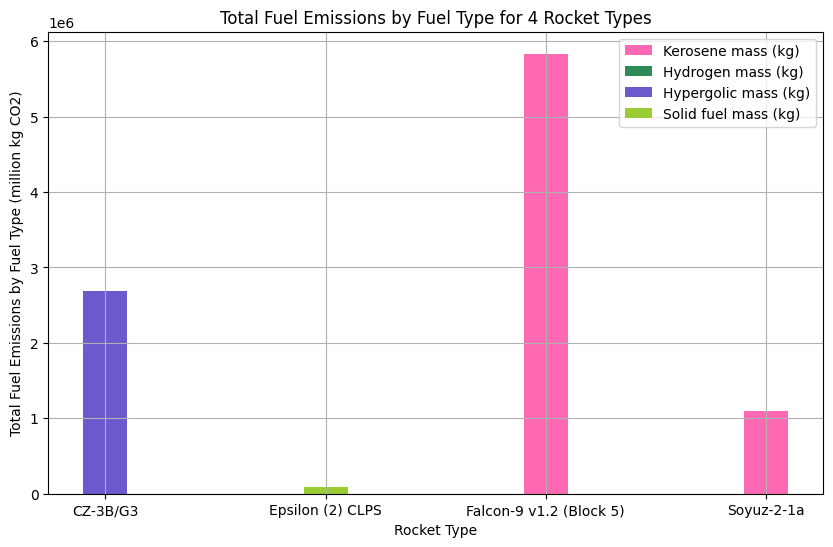

In [121]:
plt.figure(figsize=(10,6))
plt.bar(fuel_mass_sum.index, fuel_mass_sum['Kerosene mass (kg)'], label='Kerosene mass (kg)', color='hotpink', width=0.2)
plt.bar(fuel_mass_sum.index, fuel_mass_sum['Hydrogen mass (kg)'], label='Hydrogen mass (kg)', color='seagreen', width=0.2)
plt.bar(fuel_mass_sum.index, fuel_mass_sum['Hypergolic mass (kg)'], label='Hypergolic mass (kg)', color='slateblue', width=0.2)
plt.bar(fuel_mass_sum.index, fuel_mass_sum['Solid fuel mass (kg)'], label='Solid fuel mass (kg)', color='yellowgreen', width=0.2)

plt.legend()
plt.xlabel('Rocket Type')
plt.ylabel('Total Fuel Emissions by Fuel Type (million kg CO2)')
plt.title('Total Fuel Emissions by Fuel Type for 4 Rocket Types')
plt.grid()

1. Set the bar_width and bar_offset variables. This needs to be bar_widthx2 to provide a reasonable space between the groups of bars, but this 'x2' can be played with to see the space between the bars and the overlap.
2. We need to convert the index values to a numeric type so we can perform a subtraction on them without getting an error (as I found out!)
3. Plot the barchart - at the start we need to subtract barr_offset from x_positions. This shifts the x-position of the bars to the left which creates the offset. This means the bars for each fuel-types will be positioned to the left, meaning they will be side by side. 
*In practice, this means if there are null values, our chart will show large blank spaces*

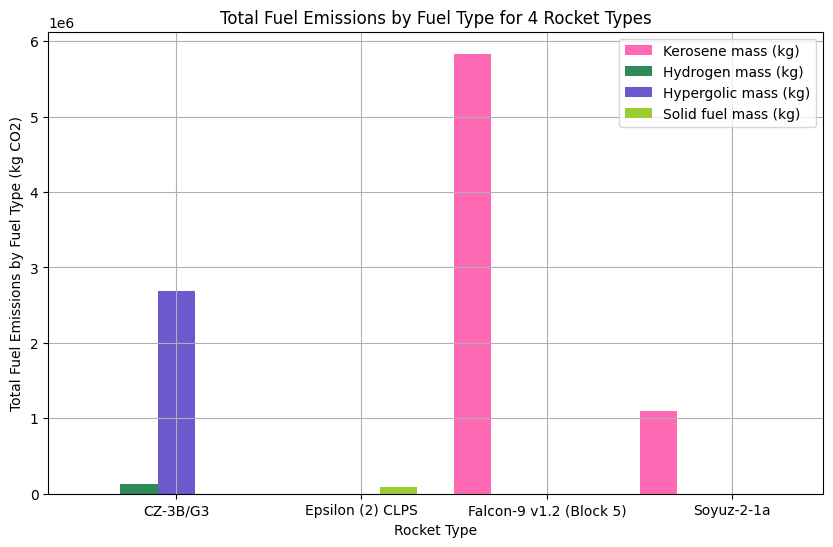

In [134]:
plt.figure(figsize=(10, 6))

bar_width = 0.2
bar_offset = bar_width * 2

x_positions = pd.RangeIndex(len(fuel_mass_sum))  # Numeric positions for the x-axis

plt.bar(x_positions - bar_offset, fuel_mass_sum['Kerosene mass (kg)'], label='Kerosene mass (kg)', color='hotpink', width=bar_width)
plt.bar(x_positions - bar_offset/2, fuel_mass_sum['Hydrogen mass (kg)'], label='Hydrogen mass (kg)', color='seagreen', width=bar_width)
plt.bar(x_positions, fuel_mass_sum['Hypergolic mass (kg)'], label='Hypergolic mass (kg)', color='slateblue', width=bar_width)
plt.bar(x_positions + bar_offset/2, fuel_mass_sum['Solid fuel mass (kg)'], label='Solid fuel mass (kg)', color='yellowgreen', width=bar_width)

plt.legend()
plt.xlabel('Rocket Type')
plt.ylabel('Total Fuel Emissions by Fuel Type (kg CO2)')
plt.title('Total Fuel Emissions by Fuel Type for 4 Rocket Types')
plt.grid()

plt.xticks(x_positions, fuel_mass_sum.index)  # Set the x-axis ticks and labels

plt.show()

From the breakdown of Fuel Type and Rocket Type, you can see that the Fuel Type that produces the most amount of emissions by far is Kerosene. Kerosene is a type of rocket fuel; it is used in liquid fueled rocket engines. It is a refined form of kerosene fuel that has been purified and processed to meet the requirements for rocket propulsion(i.e. the process of expelling fuel to propel a rocket into space). It is the only type of Rocket Fuel used in Rocket launches by SpaceX in 2019. China Aerospace Science and Technology Corporation (CASC) has used Hypergolic Fuel and Hydrogen Fuel instead of Kerosene Fuel. 

Hypergolic fuel is a type of rocket propellant that ignites spontaneously upon contact with another component, known as the oxidizer, without the need for an ignition source like a spark or flame. In hypergolic fuel systems, the fuel and oxidizer are stored separately and are combined in the combustion chamber of the rocket engine, where they immediately react and ignite. The hypergolic reaction produces high-temperature gases, which are expelled through a nozzle to create thrust and propel the rocket.One advantage of hypergolic fuels is their simplicity and reliability. Since they ignite spontaneously, there is no need for complex ignition systems, which can be prone to failure. Hypergolic propellants have been widely used in various space missions, including satellite launches, spacecraft maneuvers, and even human spaceflight missions. However, they are highly toxic and require careful handling and storage procedures to ensure safety.

Hydroden fuel is a type of gas (H2) that is used as a propellant for rocket engines. It is often used in combination with liquid oxygen (LOX) as an oxidizer in a rocket engine's combustion process. The hydrogen fuel and liquid oxygen are stored separately in tanks onboard the rocket and are combined in the combustion chamber, where they undergo a controlled chemical reaction called combustion. This reaction releases a large amount of energy, generating high-pressure and high-velocity exhaust gases that are expelled through a nozzle, creating thrust and propelling the rocket forward. There are several advantages to using Hydrogen (It's cleaner and produces water vapour as its main byproduct, it has a higher thrust efficiency meaning it allows rockets to achieve higher speeds and carry heavier payloads, and finally it is can be obtained from a lot of sources in a clean way!)

However, there are some disadvantages, such as it requires careful handling and storage due to its low density and high flammability. Additionally, the cryogenic temperature requirements for storing hydrogen at extremely low temperatures (-253°C or -423°F) can pose engineering and operational challenges.

Solid fuel mass refers to a type of propellant that is in a solid state. It typically consists of a mixture of fuel and oxidizer components, compressed together into a solid form. Solid fuel rockets have a simpler design compared to liquid-fueled rockets because the propellant is already in a stable and compact form, eliminating the need for separate storage tanks and complex fuel delivery systems. When the solid fuel rocket is ignited, the combustion of the solid propellant releases a large amount of energy, creating hot gases that are expelled through a nozzle, generating thrust. The simplicity and reliability of solid fuel rockets make them a popular choice for applications such as military missiles, small satellite launches, and booster stages of larger launch vehicles. Solid fuel mass is easy to store and handle, does not require any special pressurisation systems or cryogenic temperatures and has a high thrust-to-weight ratio. However, is can be hazardous due to its highly energetic nature and potential for uncontrolled ignition and precombustion. 

As a fuel type, Kerosene is often used for many reasons. It can provide a significant amount of energy per unit of volume, allowinf rockets to achieve high speeds and payloads. It is relatively inexpensive and widely available, making it cost-effective compared to other more environmentally friendly fuel types. It is compatible with a range of rockets engine designs and can be used in combination with various oxidizers, such as liquid oxygen (LOX), to create combustible mixture. While kerosene is a hydrocarbon fuel and emits carbon dioxide (CO2) when burned, its environmental impact is lower compared to other fossil fuels such as coal or gas, although we do have to consider where we are getting this fuel from? It is a liquid fuel at room temperatire and can be stored and handles safely and easily compared to other fuel types, and also does not require extreme low-temperature storage. Essentially - it is a good "all-rounder" fuel type, despite it's CO2 emissions. 

As SpaceX moves forward, one pathway they could look into is using a more environmentally friendly fuel type with less CO2 emissions, such as Hydroden fuel. Hydrogen Fuel offers the potential for significantly reduced environmental impact compared to traditional rocket fuels due to the main b product being water vapour, making it a clean and intruiging option. This is particularly important as the aerospace industry seeks to reduce its carbon footprint and mitigate the effects of greenhouse gas emissions. Efficiency and Performance: Hydrogen fuel has a higher specific impulse (thrust efficiency) compared to many other rocket fuels. It provides a higher exhaust velocity, allowing rockets to achieve greater speeds and carry heavier payloads. This increased efficiency can lead to more cost-effective launches and enable the exploration of deeper space missions. Abundance and Availability: Hydrogen is the most abundant element in the universe and can be obtained from various sources, including water and renewable energy sources. Its availability makes it a potentially sustainable and long-term fuel option for space exploration. Additionally, advancements in hydrogen production technologies, such as electrolysis powered by renewable energy, can further enhance the sustainability of hydrogen fuel.Versatility and Compatibility: Hydrogen fuel is compatible with a wide range of rocket engine designs and can be used in combination with different oxidizers, such as liquid oxygen (LOX), to create a combustible mixture. This versatility allows for flexibility in designing rocket systems and optimizing performance based on mission requirements. echnological Advancements: Researching and developing hydrogen fuel technologies for rocket launches can drive innovation and technological advancements in propulsion systems. This can lead to improvements in engine efficiency, storage and handling techniques, and overall launch capabilities. Additionally, the knowledge gained from hydrogen fuel research can have potential applications in other sectors, such as transportation and energy production. While there are challenges to overcome in terms of hydrogen storage, handling, and infrastructure, ongoing research and investment in hydrogen fuel technology can address these hurdles and pave the way for a greener and more efficient future for rocket launches. By harnessing the benefits of hydrogen fuel, the aerospace industry can contribute to a more sustainable and environmentally conscious approach to space exploration.
